In [ ]:
import os
import csv
import yaml
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import json

In [5]:
contig_processed_path = "../data/species_labelled_contigs.csv"
results_main_path = "../results/main_results"
results_thresh_path = "../results/threshold_similarities"
model_configs = "../config/models.yml"

with open(model_configs, "r") as model_file:
    models_config = yaml.safe_load(model_file)

with open(contig_processed_path) as csvfile:
    data = list(csv.reader(csvfile, delimiter=","))
dna_sequences = [i[1] for i in data[1:]]

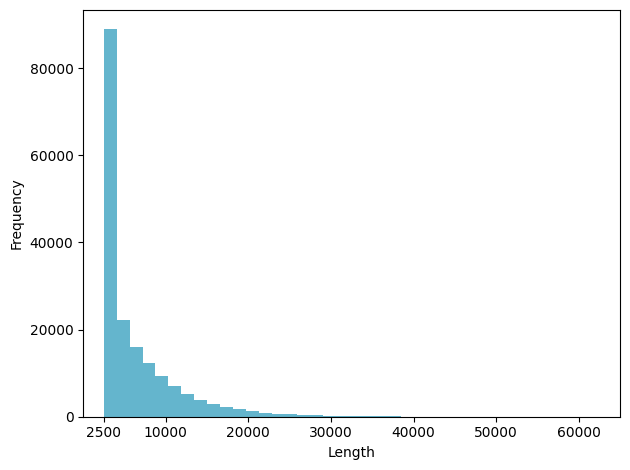

In [3]:
palette = sns.color_palette('deep')[8:10]

# Calculate each sequence length
sequence_len = [len(s) for s in dna_sequences]

# Create the histogram
plt.hist(sequence_len, bins=40, range=(2500, 65000), color=palette[1])

# Add a title and labels
plt.xlabel('Length')
plt.ylabel('Frequency')

current_ticks = plt.xticks()[0] 
new_ticks = [tick for tick in current_ticks if tick != 0] 
new_ticks.append(2500)  
plt.xticks(sorted(new_ticks)) 
plt.xlim(0, 65000)
plt.tight_layout()
# Save the figure as an SVG file
plt.savefig('../figures/seq_len_hist.svg')

# Display the plot
plt.show()


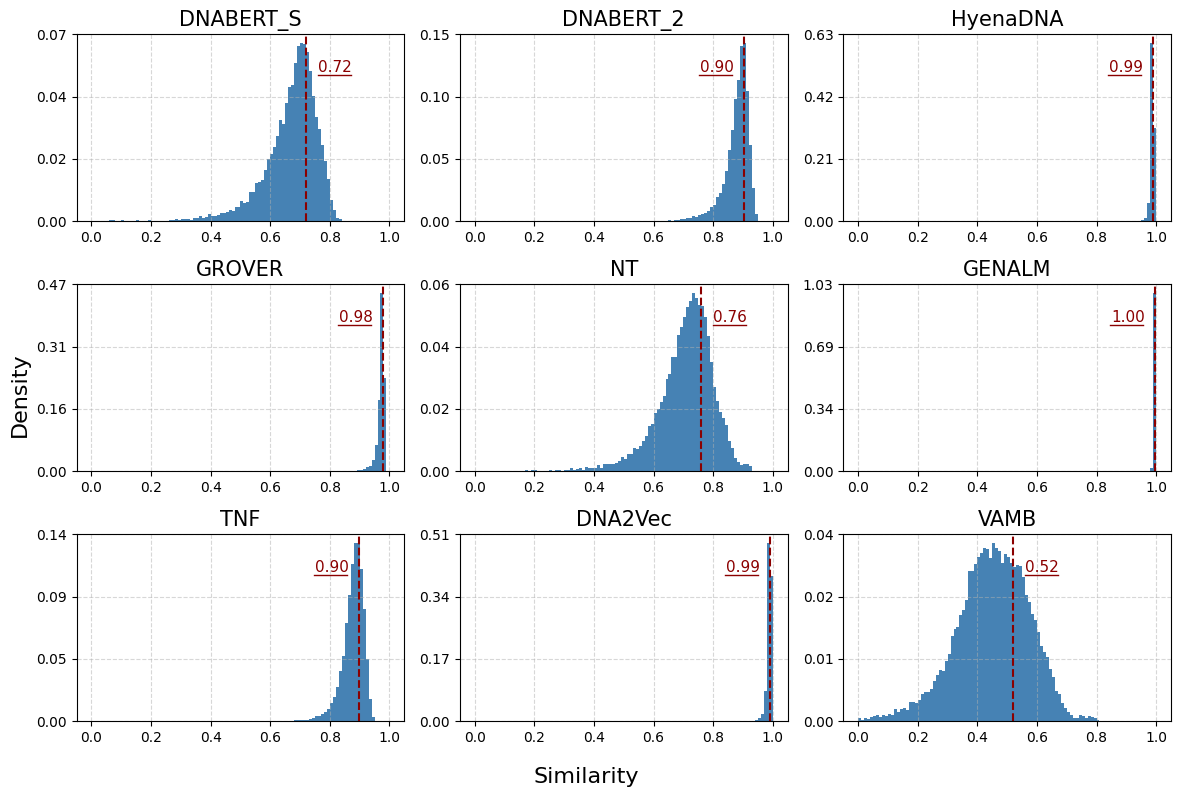

In [99]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))  
axes = axes.flatten()
color_thres = 'darkred'

for i, model_name in enumerate(models_config.keys()):
    results_threshold_similarities_file = os.path.join(
        results_thresh_path,
        model_name + "_70.npy",
    )
    # Load threshold similarities
    thresh_sim = np.load(results_threshold_similarities_file)

    # Plot a histogram with proportions
    axes[i].hist(thresh_sim, bins=100, range=(0, 1), density=True, color='steelblue')
    axes[i].set_title(f"{model_name}", fontsize=15)
    axes[i].grid(True, linestyle='--', alpha=0.5)
    
    
    percentile_70 = np.percentile(thresh_sim, 70)
    axes[i].axvline(percentile_70, color=color_thres, linestyle='dashed', linewidth=1.5, label=f'70th Percentile: {percentile_70:.2f}')
    
    if model_name in ['DNABERT_S', 'NT', 'VAMB']:
        # For specific models, put the label to the right of the vertical line
        axes[i].text(percentile_70 + 0.04, 0.8 * max(axes[i].get_ylim()), 
                     f'{percentile_70:.2f}', color=color_thres, fontsize=11, ha='left')
        axes[i].plot([percentile_70 + 0.04, percentile_70 + 0.04 + 0.11], 
             [0.78 * max(axes[i].get_ylim())] * 2, color=color_thres, lw=1)
    else:
        # For other models, put the label to the left of the vertical line
        axes[i].text(percentile_70 - 0.09, 0.8 * max(axes[i].get_ylim()), 
                     f'{percentile_70:.2f}', color=color_thres, fontsize=11, ha='center')
        axes[i].plot([percentile_70 + -0.04, percentile_70 + -0.04 - 0.11], 
             [0.78 * max(axes[i].get_ylim())] * 2, color=color_thres, lw=1)

    
    y_min, y_max = axes[i].get_ylim()  # Get the current y-axis limits
    y_ticks = np.linspace(y_min, y_max, 4)  # Generate 4 evenly spaced ticks
    axes[i].set_yticks(y_ticks)  # Set the ticks
    axes[i].set_yticklabels([f'{tick/100:.2f}' for tick in y_ticks])  # Format the tick labels  

# Add shared x and y-axis labels
fig.supxlabel('Similarity', fontsize=16)
fig.supylabel('Density', fontsize=16)

plt.tight_layout()
# Save the figure as an SVG file
plt.savefig('../figures/sim_hist_3x3.svg')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

C:\Users\ah140\AppData\Local\Temp\ipykernel_14356\3368535930.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis').reversed()


Sums (F1 0.5-1.0) for type 'remove':
  DNABERT_S: 44
  DNABERT_2: 0
  HyenaDNA: 0
  GROVER: 0
  NT: 0
  GENALM: 0
  TNF: 6
  DNA2Vec: 0
  VAMB: 4
Type: remove
F1 0.1-0.2: [35, 32, 10, 4, 3, 12, 38, 13, 22]
F1 0.2-0.3: [21, 9, 2, 2, 1, 5, 9, 1, 9]
F1 0.3-0.4: [11, 0, 0, 1, 0, 1, 11, 5, 5]
F1 0.4-0.5: [12, 2, 0, 0, 0, 0, 2, 0, 1]
F1 0.5-0.6: [10, 0, 0, 0, 0, 0, 4, 0, 2]
F1 0.6-0.7: [13, 0, 0, 0, 0, 0, 1, 0, 1]
F1 0.7-0.8: [6, 0, 0, 0, 0, 0, 0, 0, 1]
F1 0.8-0.9: [10, 0, 0, 0, 0, 0, 1, 0, 0]
F1 0.9-1.0: [5, 0, 0, 0, 0, 0, 0, 0, 0]
F1 Total: [123, 43, 12, 7, 4, 18, 66, 19, 41]
Sums (F1 0.5-1.0) for type 'nearest_centroid':
  DNABERT_S: 41
  DNABERT_2: 0
  HyenaDNA: 0
  GROVER: 0
  NT: 0
  GENALM: 0
  TNF: 6
  DNA2Vec: 0
  VAMB: 4
Type: nearest_centroid
F1 0.1-0.2: [35, 32, 12, 4, 3, 13, 40, 12, 22]
F1 0.2-0.3: [20, 9, 1, 2, 1, 4, 10, 1, 8]
F1 0.3-0.4: [13, 0, 0, 1, 0, 1, 11, 5, 6]
F1 0.4-0.5: [14, 2, 0, 0, 0, 0, 2, 0, 1]
F1 0.5-0.6: [8, 0, 0, 0, 0, 0, 4, 0, 2]
F1 0.6-0.7: [14, 0, 0, 0, 0, 0

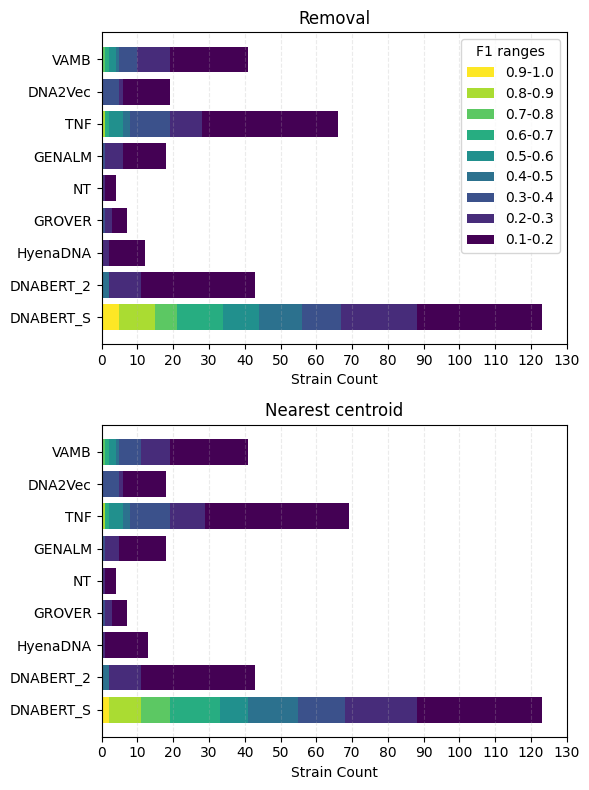

In [ ]:
# Create a colormap
cmap = cm.get_cmap('viridis').reversed()
colors = cmap(np.linspace(0, 1, 9)) 

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

for idx, type in enumerate(['remove', 'nearest_centroid']):
    f1_01 = []
    f1_02 = []
    f1_03 = []
    f1_04 = []
    f1_05 = []
    f1_06 = []
    f1_07 = []
    f1_08 = []
    f1_09 = []
    sums_05_to_09 = {}

    for model_name in models_config.keys():
        # Load the f1 results
        results_path = os.path.join(results_main_path, f'{model_name}_{type}.json')
        with open(results_path) as f:
            results_dict = json.load(f)
        
        f1_01.append(results_dict[model_name]['f1_results'][0]-results_dict[model_name]['f1_results'][1])
        f1_02.append(results_dict[model_name]['f1_results'][1]-results_dict[model_name]['f1_results'][2])
        f1_03.append(results_dict[model_name]['f1_results'][2]-results_dict[model_name]['f1_results'][3])
        f1_04.append(results_dict[model_name]['f1_results'][3]-results_dict[model_name]['f1_results'][4])
        f1_05.append(results_dict[model_name]['f1_results'][4]-results_dict[model_name]['f1_results'][5])
        f1_06.append(results_dict[model_name]['f1_results'][5]-results_dict[model_name]['f1_results'][6])
        f1_07.append(results_dict[model_name]['f1_results'][6]-results_dict[model_name]['f1_results'][7])
        f1_08.append(results_dict[model_name]['f1_results'][7]-results_dict[model_name]['f1_results'][8])
        f1_09.append(results_dict[model_name]['f1_results'][8])
    

    f1_total = [sum(x) for x in zip(f1_01, f1_02, f1_03, f1_04, f1_05, f1_06, f1_07, f1_08, f1_09)]
    
    print(f"Type: {type}")
    print("F1 0.1-0.2:", f1_01)
    print("F1 0.2-0.3:", f1_02)
    print("F1 0.3-0.4:", f1_03)
    print("F1 0.4-0.5:", f1_04)
    print("F1 0.5-0.6:", f1_05)
    print("F1 0.6-0.7:", f1_06)
    print("F1 0.7-0.8:", f1_07)
    print("F1 0.8-0.9:", f1_08)
    print("F1 0.9-1.0:", f1_09)
    print("F1 Total:", f1_total)
    
    
    x_positions = np.arange(len(models_config.keys()))

    # Plot a stacked bar graph in the current subplot
    ax = axes[idx]
    ax.barh(x_positions, f1_09, color=colors[0], label='0.9-1.0')
    ax.barh(x_positions, f1_08, left=f1_09, color=colors[1], label='0.8-0.9')
    ax.barh(x_positions, f1_07, left=np.add(f1_09, f1_08), color=colors[2], label='0.7-0.8')
    ax.barh(x_positions, f1_06, left=np.add(np.add(f1_09, f1_08), f1_07), color=colors[3], label='0.6-0.7')
    ax.barh(x_positions, f1_05, left=np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), color=colors[4], label='0.5-0.6')
    ax.barh(x_positions, f1_04, left=np.add(np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), f1_05), color=colors[5], label='0.4-0.5')
    ax.barh(x_positions, f1_03, left=np.add(np.add(np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), f1_05), f1_04), color=colors[6], label='0.3-0.4')
    ax.barh(x_positions, f1_02, left=np.add(np.add(np.add(np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), f1_05), f1_04), f1_03), color=colors[7], label='0.2-0.3')
    ax.barh(x_positions, f1_01, left=np.add(np.add(np.add(np.add(np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), f1_05), f1_04), f1_03), f1_02), color=colors[8], label='0.1-0.2')

    # Add the labels and title
    ax.set_yticks(x_positions)
    ax.set_yticklabels(models_config.keys())
    ax.set_xlabel('Strain Count')
    if type == 'remove':
        ax.set_title(f'Removal')
    else:
        ax.set_title(f'Nearest centroid')

    # Add gridlines and set x-ticks every 10
    ax.grid(True, axis='x', linestyle='--', alpha=0.25)  # Gridlines only on the x-axis
    max_f1_total = max(f1_total)  # Calculate the maximum value for the x-ticks
    ax.set_xticks(np.arange(0, max_f1_total + 10, 10))  # Set x-ticks every 10

    # Add legend for only the first plot
    if type == 'remove':
        ax.legend(title='F1 ranges')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure with subplots
#plt.savefig('../figures/f1_subplots.svg', bbox_inches='tight')

# Show the figure
plt.show()


## Tables

In [61]:
species_labelled_contigs = pd.read_csv('../data/species_labelled_contigs.csv')
taxonomy = pd.read_csv('../data/metahit/taxonomy.tsv', sep='\t', header=None)
threshold_dataset_indices = np.load('../data/threshold_dataset_indices.npy')

### Genus contig count table

In [133]:
def convert_to_latex(input_data):
    backslash = "\\"
    latex_output = []
    previous_taxonomy_name = input_data[0][1]
    for taxonomy_level, taxonomy_name, genome, count in input_data:
        if taxonomy_name != previous_taxonomy_name:
            latex_output.append('\hline')
        genome_latex = genome.replace('_', '\\_')
        line = f"{taxonomy_level} & {taxonomy_name} & {genome_latex} & {count} {backslash*2}"
        latex_output.append(line)  
        previous_taxonomy_name = taxonomy_name
    return "\n".join(latex_output)

In [138]:
taxonomy_name_dict = dict(zip(taxonomy.iloc[:, 0], taxonomy.iloc[:, 2]))
taxonomy_levels_dict = dict(zip(taxonomy.iloc[:, 0], taxonomy.iloc[:, 3]))
genome_contig_count = species_labelled_contigs.value_counts('species').sort_index().items()

genus_contig_count = [
    (taxonomy_levels_dict[genome], taxonomy_name_dict[genome], genome, count) 
    for (genome, count) in genome_contig_count
]

genus_contig_count = convert_to_latex(genus_contig_count)

In [140]:
lines = genus_contig_count.strip().split("\n")

lines_per_file = 72

for i in range(5):  
    start = i * lines_per_file
    end = start + lines_per_file
    chunk = lines[start:end]
    
    # Define the file name
    file_name = f"../results/other_results/genus_contig_count_part_{i+1}.txt"
    
    # Write the chunk to the file
    with open(file_name, "w") as file:
        file.write("\n".join(chunk))

### Taxonomy counts

In [154]:
taxonomy[3].value_counts()

3
genus     271
family     14
order       6
Name: count, dtype: int64

In [155]:
taxonomy.groupby(3)[2].nunique()

3
family     3
genus     62
order      3
Name: 2, dtype: int64

In [75]:
taxonomy_genus_only = taxonomy[taxonomy[3]=='genus'][0]
contigs_only_nonthreshold = species_labelled_contigs[threshold_dataset_indices==0]
contigs_only_nonthreshold_genus = contigs_only_nonthreshold[contigs_only_nonthreshold['species'].isin(taxonomy_genus_only)]
contigs_only_nonthreshold_genus.shape

(147312, 3)

In [94]:
species_labelled_contigs[threshold_dataset_indices==1]['species'].nunique()

29

### Genus count table

In [82]:
taxonomy_non_threshold = taxonomy[taxonomy[0].isin(contigs_only_nonthreshold['species'])]
taxonomy_non_threshold_genus_only = taxonomy_non_threshold[taxonomy_non_threshold[3]=='genus']

genus_count_top_10 = taxonomy_non_threshold_genus_only[2].value_counts()[0:10]
genus_count_other = taxonomy_non_threshold_genus_only[2].value_counts()[11:].values.sum()

In [83]:
genus_count_top_10

2
Bacteroides        66
Clostridium        22
Eubacterium        13
Streptococcus      11
Bifidobacterium    10
Escherichia        10
Ruminococcus        9
Parabacteroides     8
Lactobacillus       7
Alistipes           7
Name: count, dtype: int64

In [84]:
genus_count_other

74

In [89]:
taxonomy_non_threshold_genus_only[~(taxonomy_non_threshold_genus_only[2].isin(genus_count_top_10.index))].groupby(3)[2].nunique()

3
genus    48
Name: 2, dtype: int64

In [90]:
taxonomy_non_threshold_genus_only.shape

(243, 4)